In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Введение в Pandas

In [2]:
# Import pandas and numpy
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

# Чтение и вывод данных

Основными структурами данных в Pandas являются классы **Series** и **DataFrame**.
* **Series** - представляет собой одномерный индексированный массив данных некоторого фиксированного типа. 
* **DataFrame** - то двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа (словарь объектов типа Series).

In [3]:
# Read input
df = pd.read_csv('../data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


По умолчанию Pandas выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией **set_option**:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```

А также укажем значение параметра presicion равным 2, чтобы отображать два знака после запятой (а не 6, как установлено по умолчанию.


```python
pd.set_option('precision', 2)
```

* Каждая строка представляет собой одного клиента – это **объект** исследования.
* Столбцы – **признаки** объекта.

Целевая переменная: **Churn** – Признак оттока, бинарный признак (1 – потеря клиента, то есть отток). Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым.

## shape, columns, info(). Размер данных и названия признаков

In [5]:
df.shape

(3333, 20)

In [6]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


bool, int64, float64 и object — это типы признаков. Видим, что 1 признак — логический (bool), 3 признака имеют тип object и 16 признаков — числовые. Также с помощью метода info удобно быстро посмотреть на пропуски в данных, в нашем случае их нет, в каждом столбце по 3333 наблюдения.

## astype(). Изменение типа колонки 

In [8]:
df['Churn'] = df['Churn'].astype('int64')

## describe(). Основные стат характеристики

Что показывает? число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре include.


In [10]:
df.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


## value_counts(). Распределение данных по целевой переменной

In [11]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [12]:
df['Area code'].value_counts(normalize = True)

415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

# Сортировка

## sort_values(by , asceding). Сортировка

In [13]:
df.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


# Индексация

## DataFrame['Name'].  Индексация

**Какова доля людей нелояльных пользователей в нашем датафрейме?**

In [14]:
df['Churn'].mean()

0.14491449144914492

## df[P(df['Name'])]. Логическая индексация

**Каковы средние значения числовых признаков среди нелояльных пользователей?**

In [15]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**Сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи?**

In [16]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

**Какова максимальная длина международных звонков среди лояльных пользователей (Churn == 0), не пользующихся услугой международного роуминга ('International plan' == 'No')?**

In [17]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.899999999999999

## loc/iloc. Индексация по названию и по номеру

In [18]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [19]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


## df[-1:]/ df[:1]. Последняя и первая строка

In [20]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [21]:
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


# Применение функций к ячейкам, столбцам и строкам

## apply(axis = ). Применение функции к каждому столбцу

In [22]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

## map() and replace(). Применение функции к каждой ячейке столбца


In [23]:
d = {'No': False, 'Yes': True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Группировка данных

## groupby. Общий случай
```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. К датафрейму применяется метод `groupby`, который разделяет данные по grouping_columns – признаку или набору признаков.
2. Выбираем нужные нам столбцы (columns_to_show).
3. К полученным группам применяется функция или несколько функций.

**Группирование данных в зависимости от значения признака Churn и вывод статистик по трём столбцам в каждой группе.**

In [25]:
column_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(by = ['Churn'])[column_to_show].describe(percentiles = [])

Total day minutes  Total eve minutes  Total night minutes
Churn                                                                 
0     count        2850.000000        2850.000000          2850.000000
      mean          175.175754         199.043298           200.133193
      std            50.181655          50.292175            51.105032
      min             0.000000           0.000000            23.200000
      50%           177.200000         199.600000           200.250000
      max           315.600000         361.800000           395.000000
1     count         483.000000         483.000000           483.000000
      mean          206.914079         212.410145           205.231677
      std            68.997792          51.728910            47.132825
      min             0.000000          70.900000            47.400000
      50%           217.600000         211.300000           204.800000
      max           350.800000         363.700000           354.900000

## groupby with agg. Список функций

In [26]:
df.groupby(by = ['Churn'])[column_to_show].agg([np.max, np.min, np.std, np.mean])

Total day minutes                             Total eve minutes        \
                   amax amin        std        mean              amax  amin   
Churn                                                                         
0                 315.6  0.0  50.181655  175.175754             361.8   0.0   
1                 350.8  0.0  68.997792  206.914079             363.7  70.9   

                             Total night minutes                               
             std        mean                amax  amin        std        mean  
Churn                                                                          
0      50.292175  199.043298               395.0  23.2  51.105032  200.133193  
1      51.728910  212.410145               354.9  47.4  47.132825  205.231677

# Сводные таблицы

## crosstab. Таблица сопряженности

In [27]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [28]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


## pivot_table

* values – список переменных, по которым требуется рассчитать нужные статистики,
* index – список переменных, по которым нужно сгруппировать данные,
* aggfunc — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

In [29]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


# Преобразование датафреймов

## insert(loc, column, value)

In [30]:
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls'] 
df.insert(loc = len(df.columns), column = 'Total calls', value = total_calls)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [31]:
df['Total calls 2'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls'] 
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total calls 2
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,359


## drop(axis = 0

In [32]:
df = df.drop(['Total calls 2', 'Total calls'], axis = 1) ##drop column
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [33]:
df.drop([1, 2]).head() ##2 strings drop

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# Первые попытки прогнозирования оттока

Посмотрим, как отток связан с признаком "Подключение международного роуминга" (International plan). Сделаем это с помощью сводной таблички crosstab.

In [34]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


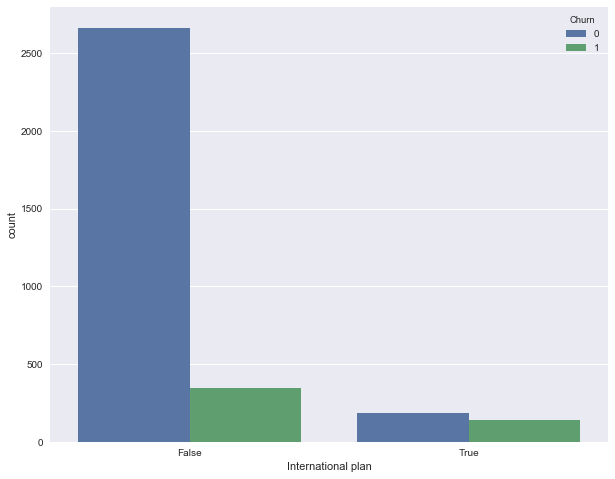

In [35]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку.

Далее посмотрим на еще один важный признак – "Число обращений в сервисный центр" (Customer service calls). Также построим сводную таблицу и картинку.

In [36]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


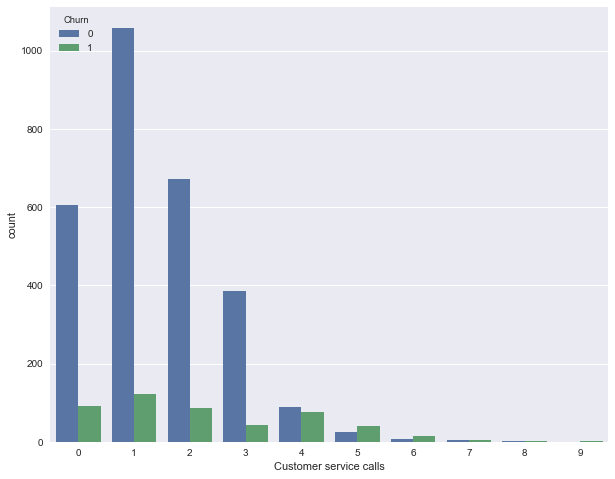

In [37]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

Добавим теперь в наш DataFrame бинарный признак — результат сравнения Customer service calls > 3. И еще раз посмотрим, как он связан с оттоком.

In [38]:
df['Many service calls'] = (df['Customer service calls'] > 3).astype('int')

In [39]:
pd.crosstab(df['Many service calls'], df['Churn'], margins=True)

Churn,0,1,All
Many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


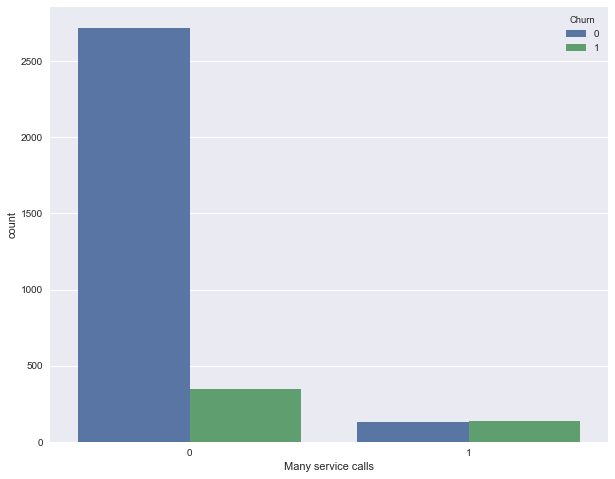

In [40]:
sns.countplot(x='Many service calls', hue='Churn', data=df);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [41]:
pd.crosstab(df['Many service calls'] & df['International plan'], df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Значит, прогнозируя лояльность клиента в случае, когда число звонков в сервисный центр меньше 4 и не подключен роуминг (и прогнозируя отток – в противном случае), можно ожидать процент "угадывания лояльности клиента" около 85.8% (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (baseline) для дальнейших моделей машинного обучения, которые мы будем строить.
* Доля лояльных клиентов в выборке – 85.5%. Самая наивная модель, ответ которой "клиент всегда лоялен" на подобных данных будет угадывать примерно в 85.5% случаев. То есть доли правильных ответов (accuracy) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
* С помощью простого прогноза, который условно можно выразить такой формулой: "International plan = False & Customer Service calls < 4 => Churn = 0, else Churn = 1", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%. Впоследствии мы поговорим о деревьях решений и разберемся, как находить подобные правила автоматически на основе только входных данных;
* Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий;
* Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнениями.